In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

## Get dividends

In [2]:
test_lst = ['AHT_div','AV_div','BA_div','GSK_div','HSBA_div','JD_div','NG_div','RDSB_div','RIO_div',
            'SPX_div','TSCO_div','TW_div','ULVR_div']

In [3]:
def get_years(lst, start_int, end_int):
    df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(lst[0]), skiprows=1)
    df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]
    df = [int(i[3:]) for i in list(df['yearend'])]
    df = list(filter(lambda i: end_int>=i>=start_int, df))
    return(df)

In [4]:
def get_dividends(lst, start_int, end_int):
    new_list = []
    for i in lst:
        df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(i), skiprows=1)
        df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]  #由于有些标题带*号，只保留字符，然后都变小写
        df = df[['yearend','total']]
        df.columns = ['year',i]
        df['year'] = [int(i[3:]) for i in list(df['year'])]
        df = df.loc[(df['year']<=end_int) & (df['year']>=start_int)] 
        df[i] = [float(re.sub("[^\d\.]", "", i)) for i in df[i]] 
        new_list.append(df[i].reset_index(drop=True))
    return(new_list)

#### Dividend from ____year to ____year

In [5]:
div_yrs = get_years(test_lst, 2015, 2020)

In [6]:
divs = get_dividends(test_lst, 2015, 2020)

In [7]:
dividends = pd.DataFrame(np.array(divs).T, columns=test_lst , index=np.array(div_yrs).T)
dividends = dividends.iloc[::-1] #将数据从老到新排列
dividends

,AHT_div,AV_div,BA_div,GSK_div,HSBA_div,JD_div,NG_div,RDSB_div,RIO_div,SPX_div,TSCO_div,TW_div,ULVR_div
2015,15.25,20.8,20.9,80.0,51.0,1.41,42.87,188.0,215.0,69.0,1.16,1.67,120.80
2016,22.50,23.3,21.3,80.0,51.0,1.48,43.34,188.0,170.0,76.0,0.00,2.82,128.04
2017,27.50,27.4,21.8,80.0,51.0,1.55,44.27,188.0,290.0,87.5,0.00,4.74,143.40
2018,33.00,30.0,22.2,80.0,51.0,1.63,45.93,188.0,307.0,100.0,3.00,6.24,154.88
2019,40.00,15.5,23.2,80.0,30.0,1.71,47.34,188.0,382.0,110.0,5.77,3.84,164.16
2020,40.65,21.0,23.7,80.0,15.0,0.28,48.57,65.3,464.0,118.0,9.15,4.14,165.80


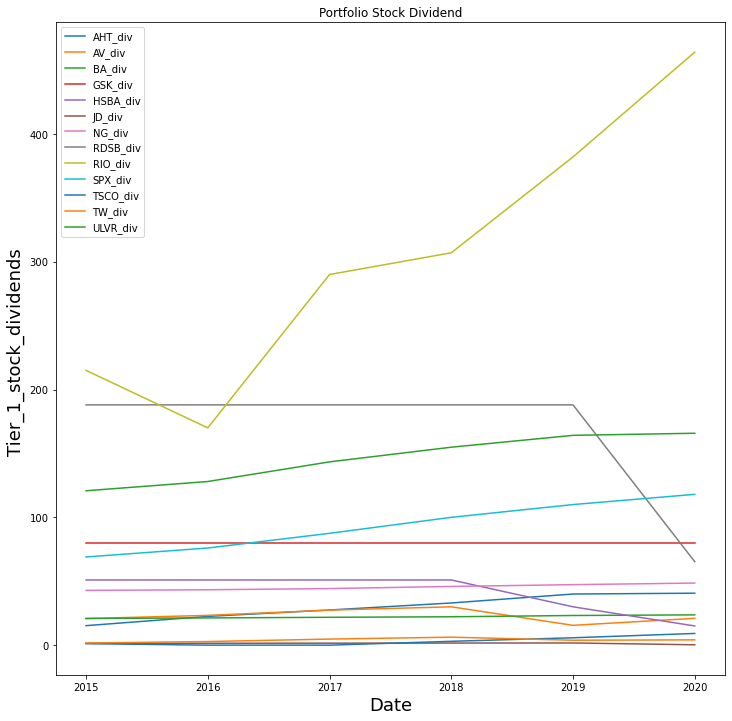

In [8]:
# visually show portfolio
title = 'Portfolio Stock Dividend'

# get the stocks
my_stocks = dividends

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stock_dividends ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

## Get stock prices

In [9]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']
# start_date = '2016-01-01'
# end_date = '2021-01-01'

In [10]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [11]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

#### price from ____year to ____year

In [12]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
# date.head()

In [13]:
prices = get_prices(stocks,'2015-01-01','2020-01-01')
# box.head()

In [14]:
prices = pd.DataFrame(np.array(prices).T, columns=stocks , index=np.array(date).T)
prices.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


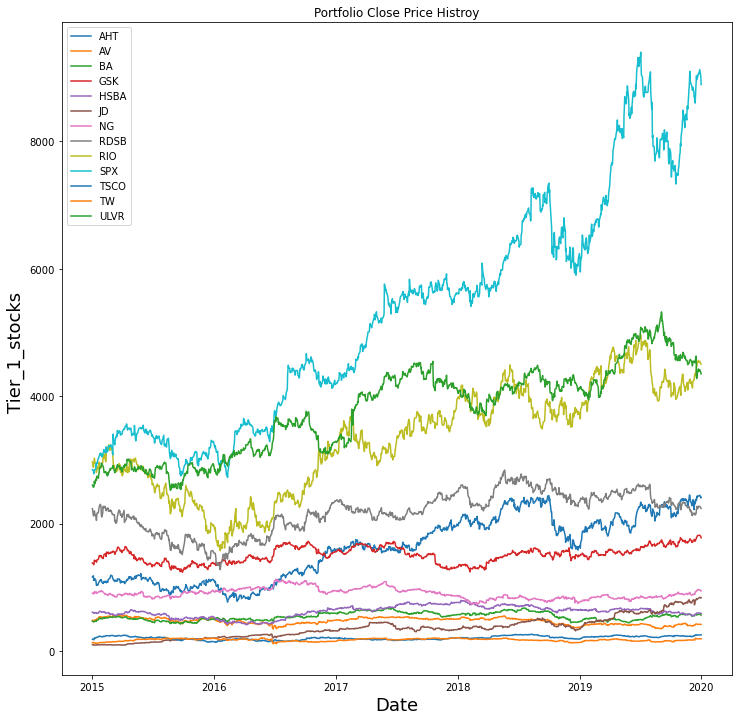

In [15]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = prices

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

#### 创建投资分配比例的权数

In [16]:
weight = 1/len(stocks)
weights = np.full(shape=len(stocks), fill_value=weight, dtype=np.float)
weights

array([0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308])

### Five years total return and Annualized return

In [17]:
first = prices.head(1) # prices at the beginning of the investment
end = prices.tail(1) # prices at the end of the investment

In [18]:
five_yrs = pd.concat([first,end])
five_yrs

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.60000,908.29999,2235.5,2970.0,2848.0,188.0,134.89999,2606.0
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.2,193.39999,4350.5


In [20]:
rtn_pct = five_yrs.pct_change()  # 检验上下计算结果是否一致
rtn_pct.iloc[1].mean()

0.9827255220602714

In [21]:
total_return = (five_yrs.iloc[1] - five_yrs.iloc[0])/five_yrs.iloc[0]   # 检验上下计算结果是否一致
total_return.mean()

0.9827255220602714

### 五年来portfolio的总收益

In [22]:
np.sum(total_return.mean() * weights)  # 平均收益乘以分配权数 再全部加起来

0.9827255220602715

### 将5年来的总收益变成Annualized return

In [23]:
((1 + np.sum(total_return.mean() * weights))**(1/5))-1 # 计算5年的每年年化收益

0.14670714720731381

#### Portfolio daily return and cumulative return

In [24]:
return_stocks = prices.pct_change()
daily_returns_portfolio_mean = return_stocks.mean()
allocated_daily_returns = weights * daily_returns_portfolio_mean

In [49]:
daily_returns_portfolio_mean

AHT     0.000759
AV     -0.000002
BA      0.000226
GSK     0.000269
HSBA    0.000055
JD      0.001857
NG      0.000096
RDSB    0.000118
RIO     0.000528
SPX     0.000995
TSCO    0.000396
TW      0.000506
ULVR    0.000481
dtype: float64

In [25]:
portfolio_return = np.sum(allocated_daily_returns)
portfolio_return

0.00048332991761167475

In [26]:
return_stocks['portfolio_daily_returns'] = return_stocks.dot(weights)
return_stocks.head(3)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR,portfolio_daily_returns
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.014592,-0.028076,-0.015345,-0.009761,-0.013235,-0.001969,0.001541,-0.047864,-0.029125,-0.005618,-0.034042,-0.008154,-0.012663,-0.014594
2015-01-06,-0.061760,-0.014443,-0.011472,-0.009127,-0.016890,-0.069034,-0.014181,-0.003524,0.021155,-0.016949,-0.015419,-0.020179,0.000389,-0.017803


#### cumulative daily return

In [39]:
cumulative_returns_daily = (1+ return_stocks['portfolio_daily_returns']).cumprod()
cumulative_returns_daily.tail(3)

2019-12-27    1.771981
2019-12-30    1.754964
2019-12-31    1.747813
Name: portfolio_daily_returns, dtype: float64

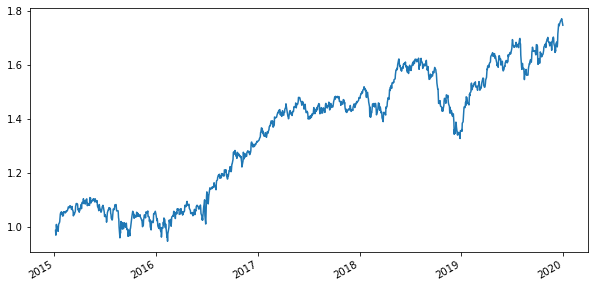

In [41]:
cumulative_returns_daily.plot(figsize=(10,5));
# cumulative_returns_daily['JD'].plot();

#### 从cumulative returns 到 年化 return

In [42]:
cumulative_returns_daily[-1]/5

0.34956252816581446

In [46]:
cumulative_returns_daily[-1]

1.7478126408290724

### 年化 return

In [48]:
((1+cumulative_returns_daily[-1])**(1/5) )-1

0.22404511046797682

#### 使用完整个的stock price data, 计算每天价格百分比变动，每天协方差，每年协方差

In [30]:
prices_pct = prices.pct_change()
cov_matrix_day = prices_pct.cov()
cov_matrix_yrs = cov_matrix_day * 250

In [31]:
cov_matrix_yrs.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.090983,0.031232,0.025076,0.016355,0.026507,0.022382,0.006531,0.026735,0.038574,0.030122,0.018020,0.02962,0.011620
AV,0.031232,0.056272,0.019670,0.011413,0.025561,0.025015,0.008004,0.021064,0.026811,0.019942,0.026479,0.04103,0.009879


#### 计算portfolio variance 和 standard deviation

In [32]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_yrs, weights))
port_variance

0.020575609703321666

In [33]:
print(str(np.round(port_variance, 3)*100) + '%')

2.1%


In [34]:
port_stddev = np.sqrt(port_variance)
port_stddev

0.14344200815424213

In [35]:
print(str(np.round(port_stddev, 3 )*100) + '%')

14.299999999999999%


#### skewness and kurtosis 研习

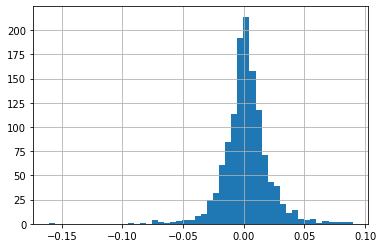

In [36]:
jd_rtn = prices['JD'].pct_change()
jd_rtn.hist(bins=50);

In [37]:
print('mean: ', jd_rtn.mean())
print('vol: ', jd_rtn.std())
print('shew: ', jd_rtn.skew())
print('kurt: ', jd_rtn.kurtosis())

mean:  0.0018566888219457448
vol:  0.0192148697903414
shew:  -0.3341476557928015
kurt:  7.336000477218182


In [38]:
print('mean: ', prices['RIO'].pct_change().mean())
print('vol: ', prices['RIO'].pct_change().std())
print('shew: ', prices['RIO'].pct_change().skew())
print('kurt: ', prices['RIO'].pct_change().kurtosis())

mean:  0.0005278520977260058
vol:  0.019924833085149384
shew:  0.05639951888430402
kurt:  2.3658011131790593


In [ ]:
rtn_5yrs_total = pd.DataFrame((np.array(prices.tail(1))-np.array(prices.head(1)))/np.array(prices.head(1)), columns=stocks )
rtn_5yrs_total

In [ ]:
rtn_5yrs_total.T.sum()

In [ ]:
rtn_5yrs_total.T.mean()

In [ ]:
rtn_5yrs_total.T.mean()/5